In [1]:
import glob
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['font.sans-serif'].insert(0, 'Arial')
mpl.rcParams['font.size'] = 12

In [14]:
save_figures = True
savefigdir_ = 'figures'

def save_name(name, folder='.', nospaces=False):
    sname = '%s/%s_%s' % (folder, mlabel, name)
    if nospaces:
        sname.replace(' ', '_')
    return sname 
    
def savefig(name, nospaces=False, **kwargs):
    if not save_figures:
        return
    kwargs_ = dict(dpi=200, bbox_inches='tight')
                   #frameon=True, facecolor='white', transparent=False)
    kwargs_.update(kwargs)
    fname = save_name(name, savefigdir_, nospaces=nospaces)
    plt.savefig(fname, **kwargs_)
    print('Saved: %s.png' % fname)

# Load CSV files

In [15]:
mlabel = '2017-05-02'

In [16]:
date = '.' #'2017-05-02'

In [17]:
dir_ = Path(date)
dir_

WindowsPath('.')

In [18]:
files = [f for f in dir_.glob('*.csv')]
files

[WindowsPath('A_SPAD_532nm.csv'),
 WindowsPath('D_SPAD_532nm.csv'),
 WindowsPath('G_SPAD_532nm_log2.csv')]

In [19]:
pwd

'E:\\Data\\Antonio\\data\\manta\\notebooks\\48-spot_paper\\alignment\\2017-05-02'

# Dataframes from csv

In [20]:
df_gg = pd.read_csv('D_SPAD_532nm.csv', index_col=0)
df_gg.head()

,ampl,center,sigma,offset,residue,ix,iy,direction
0,8962.3,-33.35,1.665,11910.8,67288.92,0,0,x
1,12827.8,-9.25,1.630,13671.6,103603.36,1,0,x
2,13552.4,14.92,1.586,14302.2,105898.81,2,0,x
3,12328.2,39.12,1.677,13040.3,126666.61,3,0,x
4,7666.4,-34.00,1.524,13227.2,44112.92,0,1,x


In [21]:
df_rg = pd.read_csv('A_SPAD_532nm.csv', index_col=0)
df_rg.head()

,ampl,center,sigma,offset,residue,ix,iy,direction
0,15102.9,-33.50,1.742,19918.9,167553.94,0,0,x
1,20737.1,-9.34,1.677,23114.2,314309.72,1,0,x
2,16334.9,14.74,1.580,16871.5,171775.64,2,0,x
3,22071.3,39.10,1.698,21182.0,338741.92,3,0,x
4,13887.8,-34.08,1.626,22289.2,87368.06,0,1,x


In [22]:
h1_gg = df_gg.query("direction == 'x'")['center'].as_matrix()
v1_gg = df_gg.query("direction == 'y'")['center'].as_matrix()
h1_gg

array([-33.35,  -9.25,  14.92,  39.12, -34.  ,  -9.79,  14.37,  38.66,
       -34.58, -10.39,  13.84,  38.03, -35.18, -10.99,  13.23,  37.49])

In [23]:
h1_rg = df_rg.query("direction == 'x'")['center'].as_matrix()
v1_rg = df_rg.query("direction == 'y'")['center'].as_matrix()
h1_rg

array([-33.5 ,  -9.34,  14.74,  39.1 , -34.08,  -9.83,  14.38,  38.66,
       -34.62, -10.36,  13.91,  38.12, -35.14, -10.88,  13.4 ,  37.64])

# Alignment plot
This plot shows D-SPAD and R-SPAD from 4x4 multiscan after alignment.

Saved: figures/2017-05-02_scan_fit_scatter.png


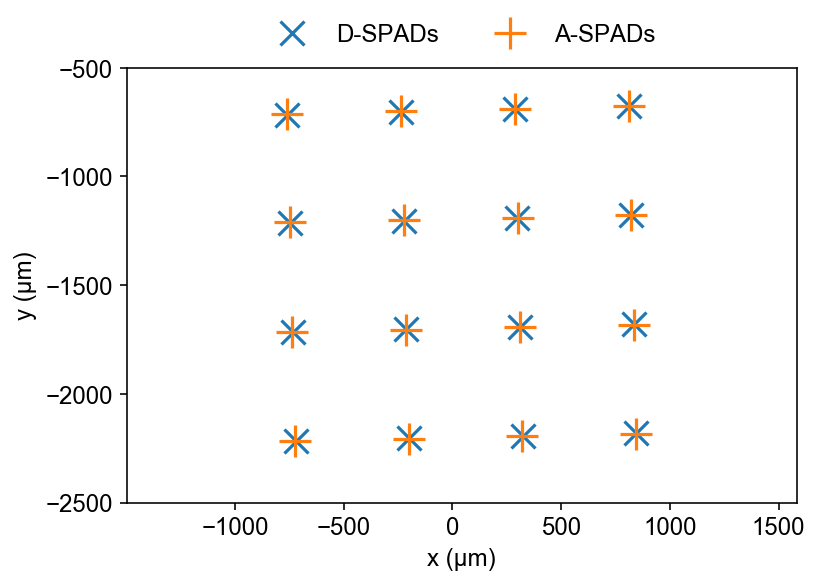

In [24]:
microns = 20 * (180/250) * 1.5  # convert 20 μm LCOS pixel in distance on the SPAD plane
plt.figure()
d_spad = plt.plot(h1_gg*microns, v1_gg*microns, 'x', ms=12, mew=1.6, label='D-SPADs')
r_spad = plt.plot(h1_rg*microns, v1_rg*microns, '+', ms=16, mew=1.6, label='A-SPADs')
#plt.xlim(-50, 80)
plt.ylim(-2500, -500)
ax = plt.gca()
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('x (μm)')
plt.ylabel('y (μm)')
plt.yticks([-2500, -2000, -1500, -1000, -500])
plt.legend(loc='lower center', ncol=2, frameon=False, bbox_to_anchor=(0.5, 1))
savefig('scan_fit_scatter')